#### Sampling analogy tasks

##### Introduction

The `InfiniteDSpritesAnalogies` dataset is an infinite stream of image analogies like this one:

![Analogy Task](analogy.png "Title")

The task is to extract the transformation that maps the reference source (top left) to reference target (top right) and apply it to the query source (bottom left) to get query target (bottom right). At test time, the query target is masked out. Note that the reference source and the query source differ only with respect to shape.

##### Quick start
The easiest way to get started is to create an instance of `InfiniteDSpritesAnalogies`. It is a subclass of PyTorch `IterableDataset`, so it is possible to iterate over it using a `Dataloader`.

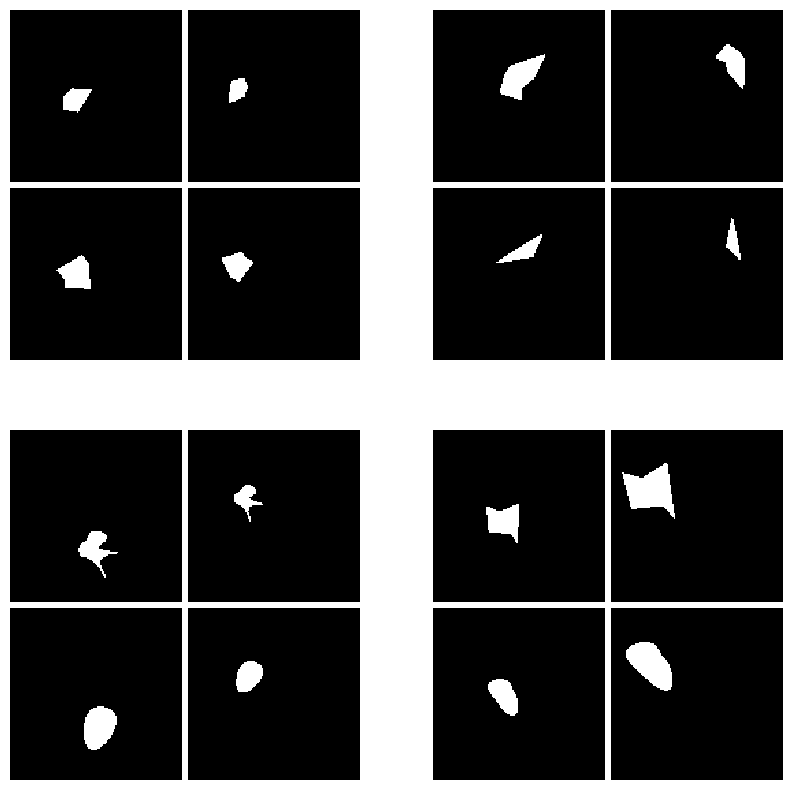

In [25]:
import numpy as np
from codis.data import InfiniteDSpritesAnalogies
from codis.visualization import draw_batch_grid
from torch.utils.data import DataLoader

dataset = InfiniteDSpritesAnalogies()
dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))

draw_batch_grid(batch, show=True)

#### Easier variants
To produce an easier variant of the task, you can use the constructor arguments to control the range from which each latent is sampled:

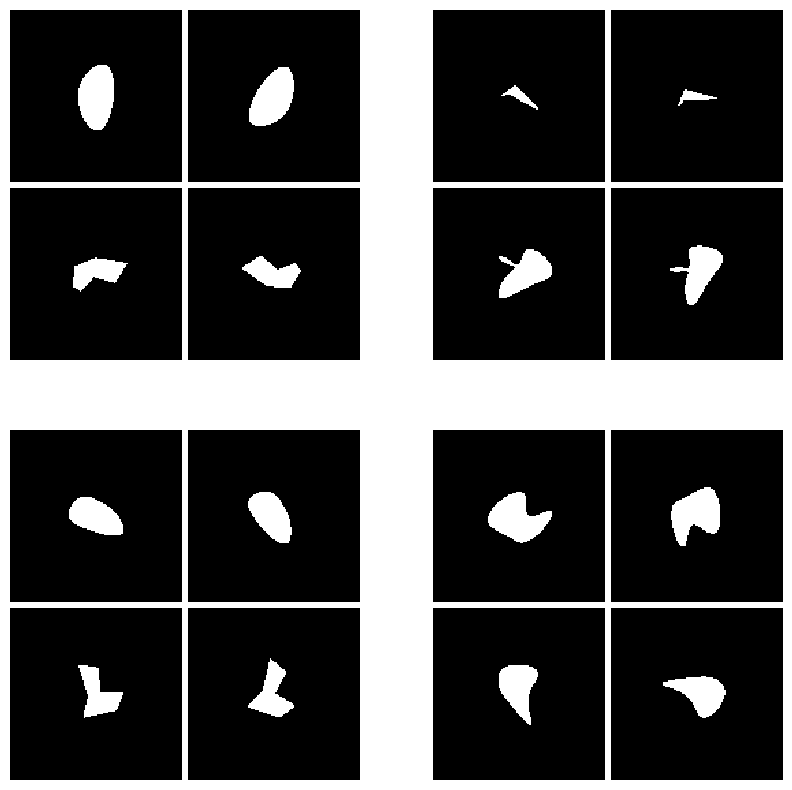

In [26]:
# only change the orientation
dataset = InfiniteDSpritesAnalogies(
    scale_range = [1],
    orientation_range = np.linspace(0, 2 * np.pi, 36),
    position_x_range = [0.5],
    position_y_range = [0.5],
)
dataloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))

draw_batch_grid(batch, show=True)

To make the task even easier, you can also fix the reference and query shapes:

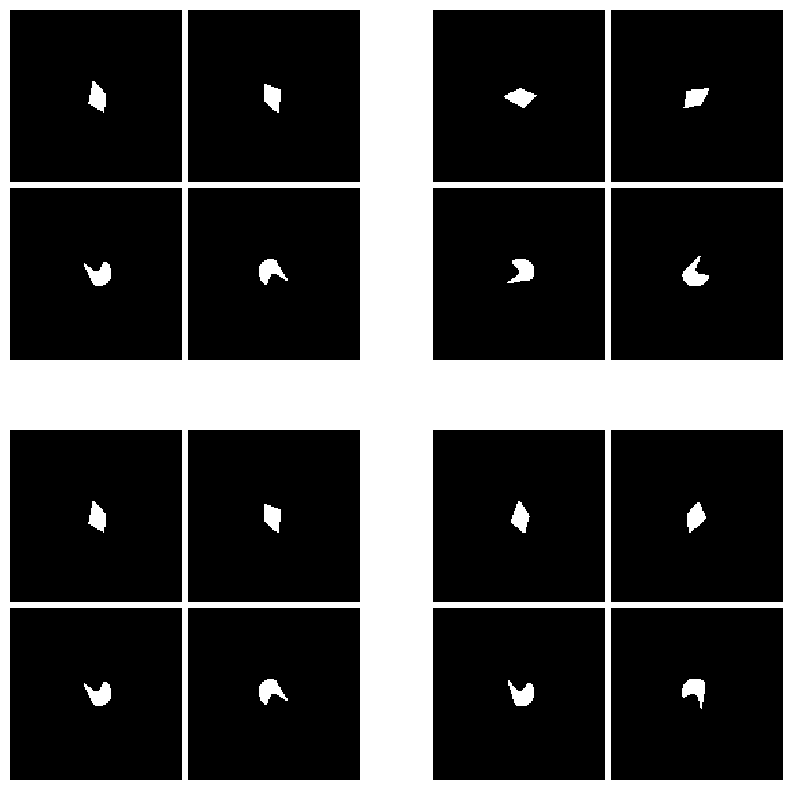

In [17]:
dataset.reference_shape = dataset.generate_shape()
dataset.query_shape = dataset.generate_shape()

dataloader = DataLoader(dataset, batch_size=4)

batch = next(iter(dataloader))

draw_batch_grid(batch, show=True)

In order to ensure reproducibility, you can seed the NumPy random number generator.

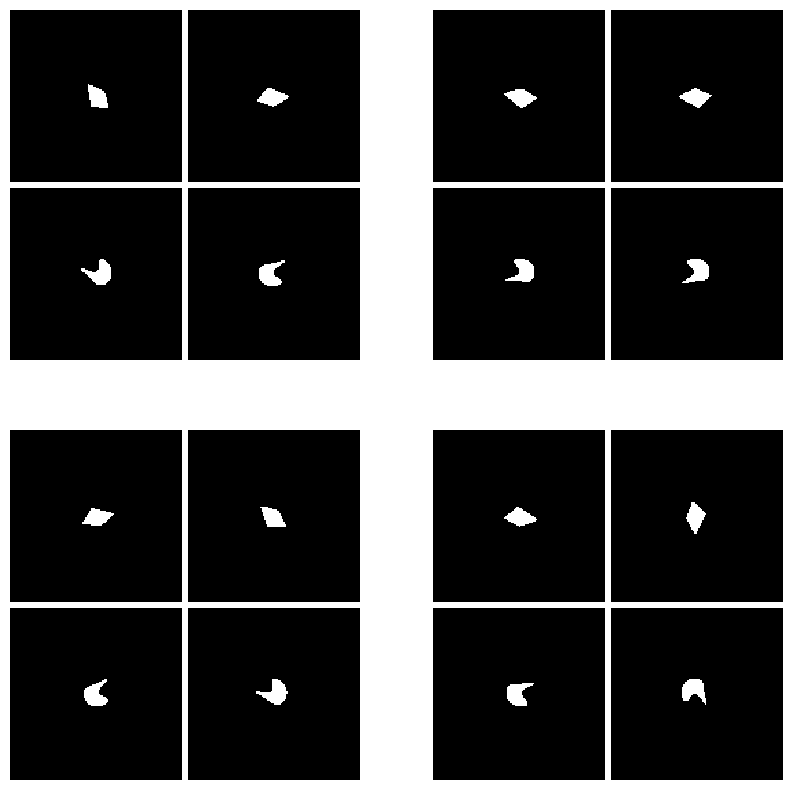

In [21]:
np.random.seed(42)

datasloader = DataLoader(dataset, batch_size=4)
batch = next(iter(dataloader))
draw_batch_grid(batch, show=True)
